In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Pavium/vcf_filtering/raw_SNP_random.vcf.gz', '/users/mcevoysu/scratch/output/Pavium/scikit-allel/raw_SNP_random.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/Pavium/scikit-allel/raw_SNP_random.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(196292,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=33.5M cbytes=6.8M cratio=4.9
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(114780,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 4, -1, -1], [0.007353,      nan,      nan], [b'C', b'', b''], 542, 1.67 , b'chr_1', 8776, -1, 0.0484, False, False, 1.534, b'.', 0.0877, [ 4, -1, -1], [0.007353,      nan,      nan], 60.,  0.,  4366425,  6.16, 647.06, [-1, -1], b'T',  0.442, 0.334, [0, 0, 0],  True, 1)
 ([ 4, -1, -1], [0.007353,      nan,      nan], [b'C', b'', b''], 542, 1.67 , b'chr_1', 8788, -1, 0.0484, False, False, 1.534, b'.', 0.0846, [ 4, -1, -1], [0.007353,      nan,      nan], 60.,  0.,  4366428,  6.16, 647.1 , [-1, -1], b'T',  0.442, 0.334, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'T', b'', b''], 542, 0.82 , b'chr_1', 8962, -1, 0.    , False, False, 0.   , b'.', 0.2538, [ 1, -1, -1], [0.001838,      nan,      nan], 60.,  0.,  4366448, 15.08, 723.68, [-1, -1], b'C', -0.97 , 0.966, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.003676,      nan,      nan], [b'A', b'', b''], 542,   nan, b'chr_8', 2351, -1, 0.    , False, False, 0.   , b'.', 0.5474, [ 2, -1, -1], [0.003676,      nan,      nan], 60., nan, 37267683, 32.26,  64.52, [-1, -1], b'G',    nan, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'A', b'', b''], 542, 0.431, b'chr_8',  792, -1, 0.    , False, False, 0.   , b'.', 0.4123, [ 2, -1, -1], [0.003676,      nan,      nan], 60.,  0., 37267859,  8.16,  48.96, [-1, -1], b'G',  1.83 , 0.307, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'T', b'', b''], 542, 0.674, b'chr_8',  606, -1, 0.    , False, False, 0.   , b'.', 0.3847, [ 2, -1, -1], [0.003676,      nan,      nan], 60.,  0., 37267910, 15.42,  92.53, [-1, -1], b'G', -1.036, 0.693, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(81512,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 1, -1, -1], [0.001838,      nan,      nan], [b'*', b'', b''], 542,  nan, b'chr_1', 8304, -1, 0.    ,  True, False,  0.   , b'.', -0.0038, [ 1, -1, -1], [0.001838,      nan,      nan],   nan, nan,  4387391,  0.  ,    0., [-1, -1], b'T',    nan, 0.055, [-1,  0,  0], False, 1)
 ([ 3, -1, -1], [0.005515,      nan,      nan], [b'*', b'', b''], 542,  nan, b'chr_1', 6012, -1, 0.0242,  True, False,  0.   , b'.',  0.0212, [ 1, -1, -1], [0.001838,      nan,      nan],   nan, nan,  4387608,  0.  ,    0., [-1, -1], b'T',    nan, 0.037, [-1,  0,  0], False, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'*', b'', b''], 542, 0.79, b'chr_1', 8699, -1, 0.    ,  True, False, 11.335, b'.', -0.005 , [ 1, -1, -1], [0.001838,      nan,      nan], 60.  ,  0.,  4434557,  0.  ,    0., [-1, -1], b'T', -0.875, 0.014, [-1,  0,  0], False, 1)
 ...
 ([ 6, -1, -1], [0.011   ,      nan,      nan], [b'*', b'', b''], 542,  nan, b'chr_8',  365, -1, 0.    ,  True, False,  0.   , b'.',  0.3561, [13, -1, -1], [0.024   ,      nan,      nan],   nan, nan, 37246931,  0.  ,    0., [-1, -1], b'A',    nan, 2.494, [-1,  0,  0], False, 1)
 ([ 6, 24, -1], [0.011   , 0.044   ,      nan], [b'*', b'G', b''], 540, 0.  , b'chr_8',  358, -1, 0.    , False, False,  0.   , b'.',  0.3554, [19, 75, -1], [0.035   , 0.138   ,      nan], 57.67,  0., 37246932, 28.53, 1769., [-1, -1], b'T',  0.253, 2.904, [-1,  0,  0], False, 2)
 ([ 6, -1, -1], [0.011   ,      nan,      nan], [b'*', b'', b''], 542,  nan, b'chr_8',  362, -1, 0.    ,  True, False,  0.   , b'.',  0.3389, [13, -1, -1], [0.024   ,      nan,      nan],   nan, nan, 37246933,  0.  ,    0., [-1, -1], b'G',    nan, 2.494, [-1,  0,  0], False, 1)]

## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 113334,   1425,     21])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

1446

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(113334,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 4, -1, -1], [0.007353,      nan,      nan], [b'C', b'', b''], 542, 1.67 , b'chr_1', 8776, -1, 0.0484, False, False, 1.534, b'.', 0.0877, [ 4, -1, -1], [0.007353,      nan,      nan], 60.,  0.,  4366425,  6.16, 647.06, [-1, -1], b'T',  0.442, 0.334, [0, 0, 0],  True, 1)
 ([ 4, -1, -1], [0.007353,      nan,      nan], [b'C', b'', b''], 542, 1.67 , b'chr_1', 8788, -1, 0.0484, False, False, 1.534, b'.', 0.0846, [ 4, -1, -1], [0.007353,      nan,      nan], 60.,  0.,  4366428,  6.16, 647.1 , [-1, -1], b'T',  0.442, 0.334, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'T', b'', b''], 542, 0.82 , b'chr_1', 8962, -1, 0.    , False, False, 0.   , b'.', 0.2538, [ 1, -1, -1], [0.001838,      nan,      nan], 60.,  0.,  4366448, 15.08, 723.68, [-1, -1], b'C', -0.97 , 0.966, [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.003676,      nan,      nan], [b'A', b'', b''], 542,   nan, b'chr_8', 2351, -1, 0.    , False, False, 0.   , b'.', 0.5474, [ 2, -1, -1], [0.003676,      nan,      nan], 60., nan, 37267683, 32.26,  64.52, [-1, -1], b'G',    nan, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'A', b'', b''], 542, 0.431, b'chr_8',  792, -1, 0.    , False, False, 0.   , b'.', 0.4123, [ 2, -1, -1], [0.003676,      nan,      nan], 60.,  0., 37267859,  8.16,  48.96, [-1, -1], b'G',  1.83 , 0.307, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001838,      nan,      nan], [b'T', b'', b''], 542, 0.674, b'chr_8',  606, -1, 0.    , False, False, 0.   , b'.', 0.3847, [ 2, -1, -1], [0.003676,      nan,      nan], 60.,  0., 37267910, 15.42,  92.53, [-1, -1], b'G', -1.036, 0.693, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

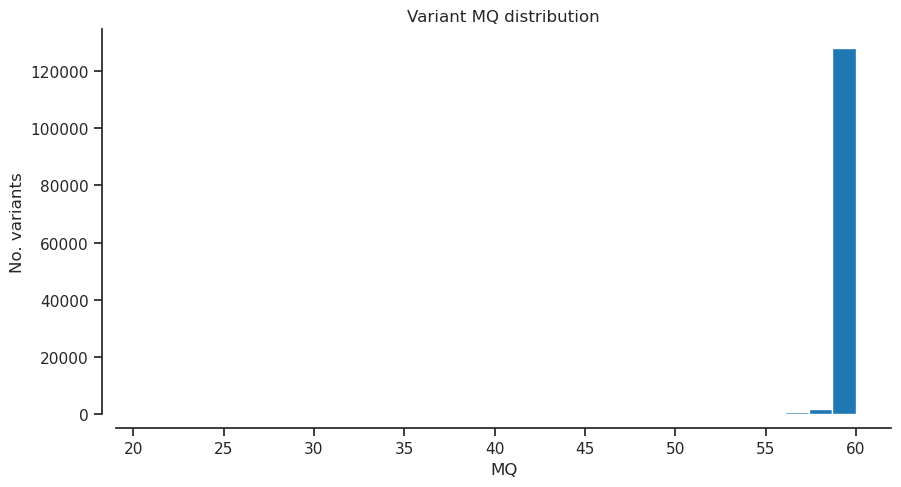

In [14]:
plot_hist('MQ','var') # RMS mapping quality

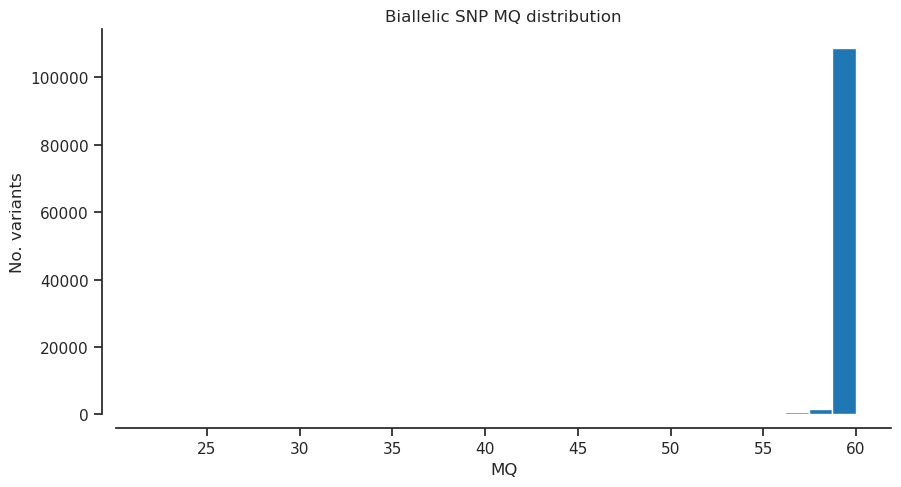

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

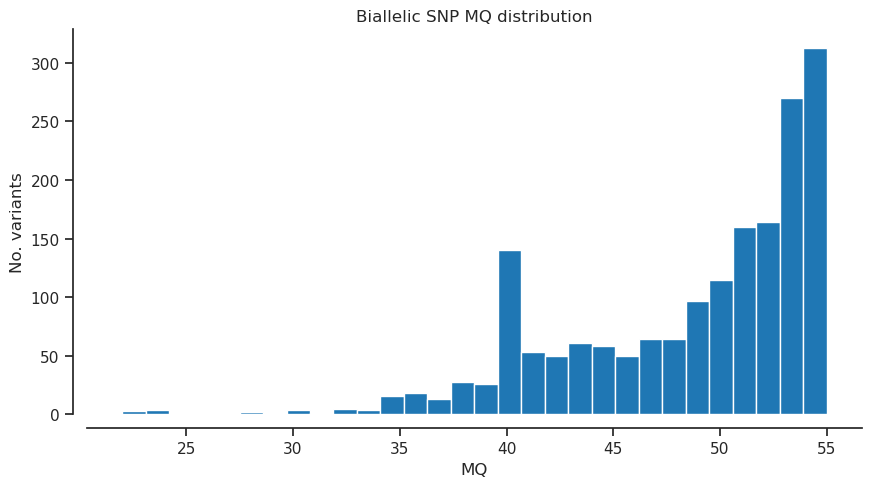

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

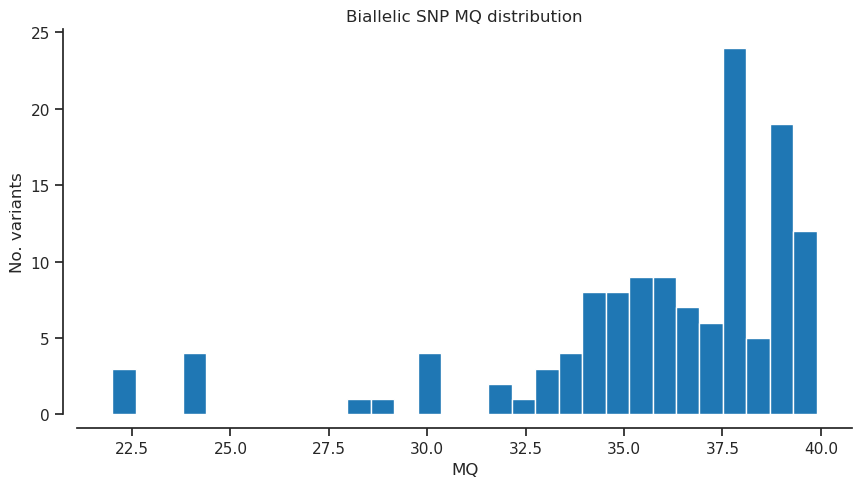

In [19]:
plot_hist('MQ')

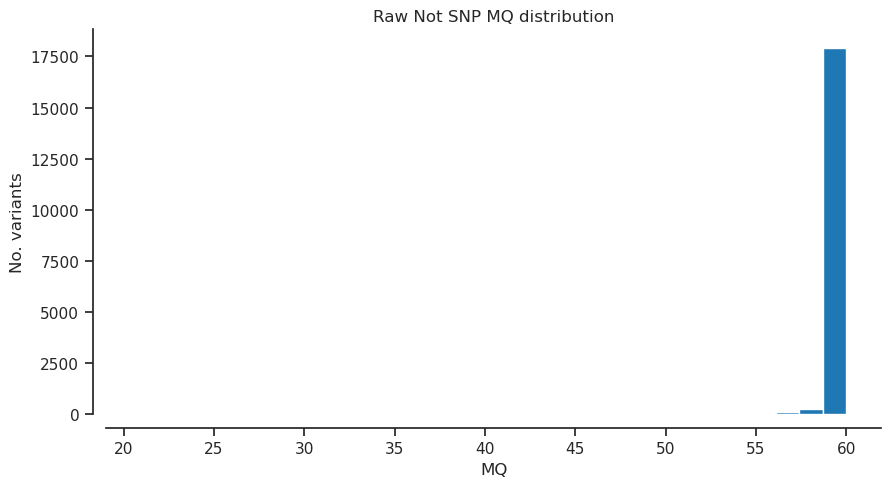

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

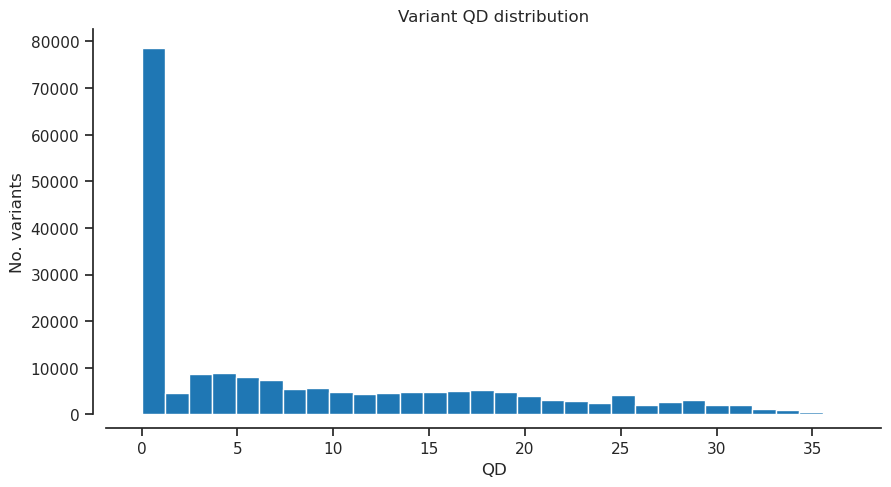

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

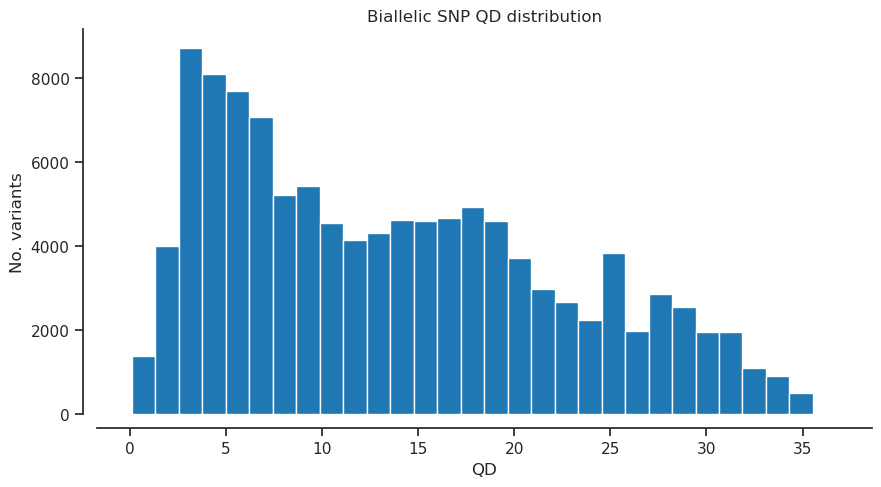

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

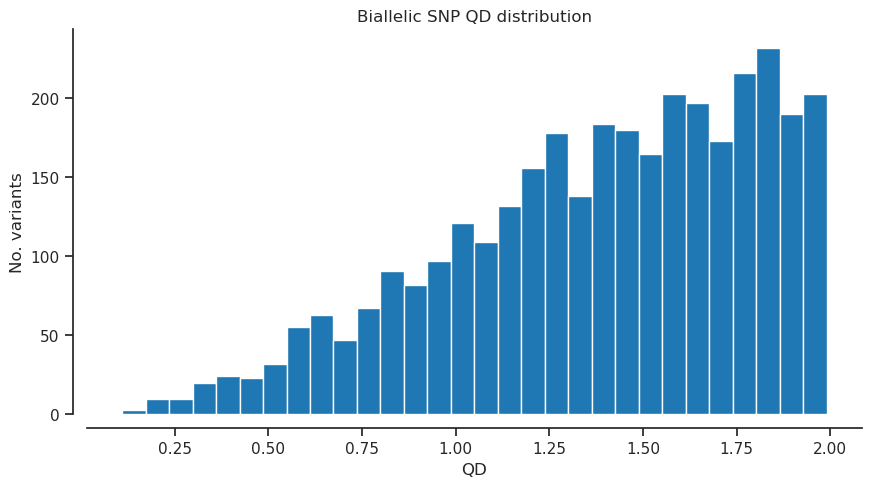

In [24]:
plot_hist('QD')

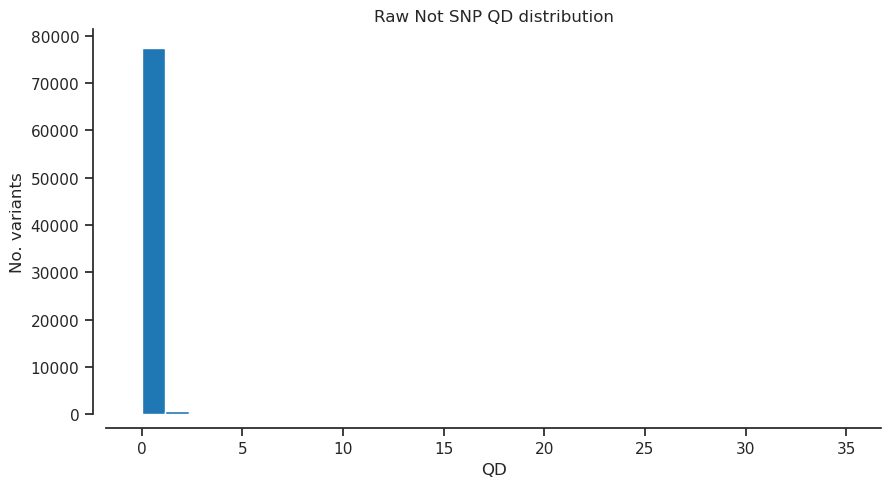

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

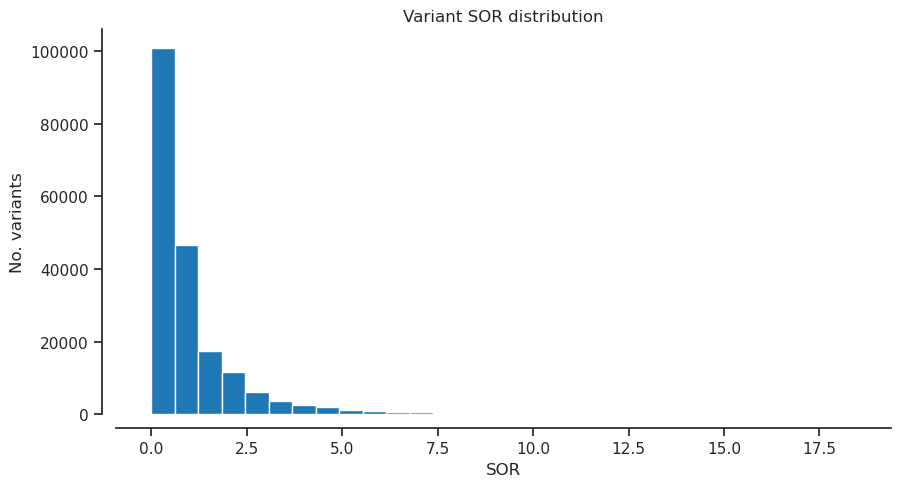

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

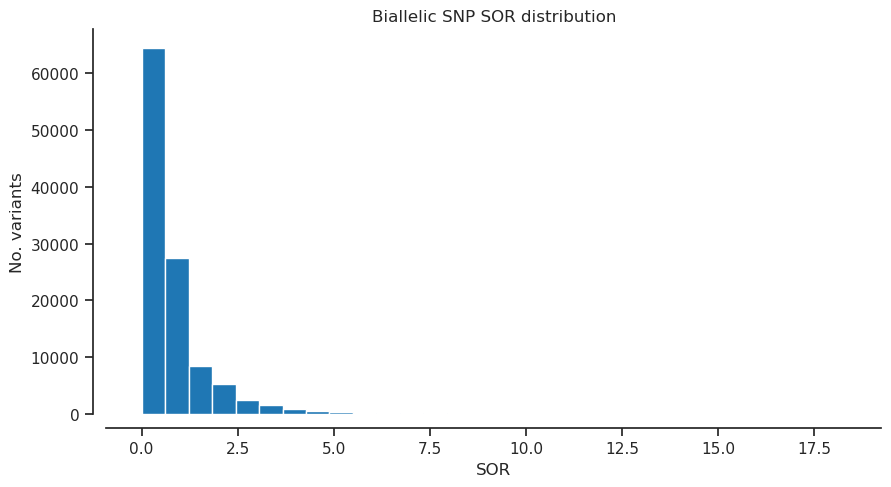

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

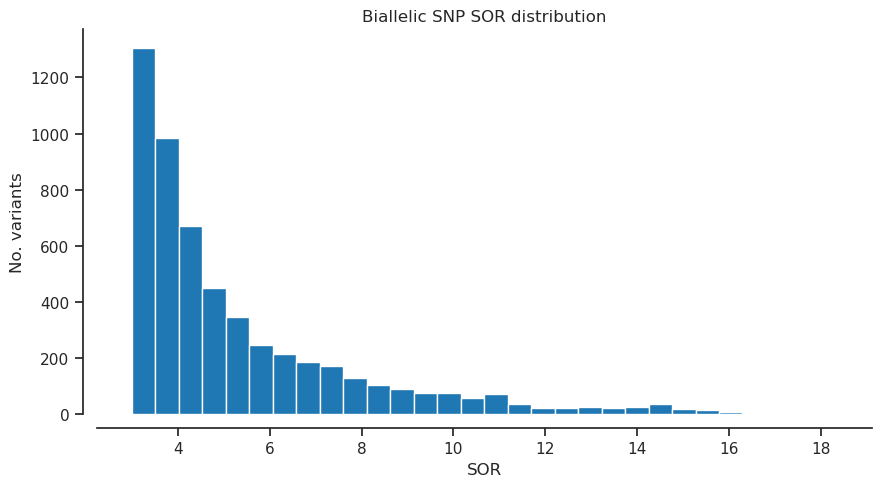

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

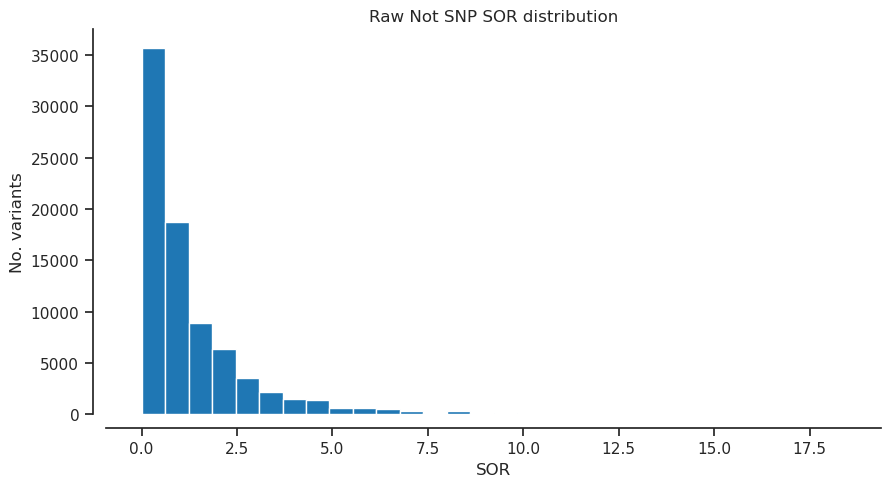

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

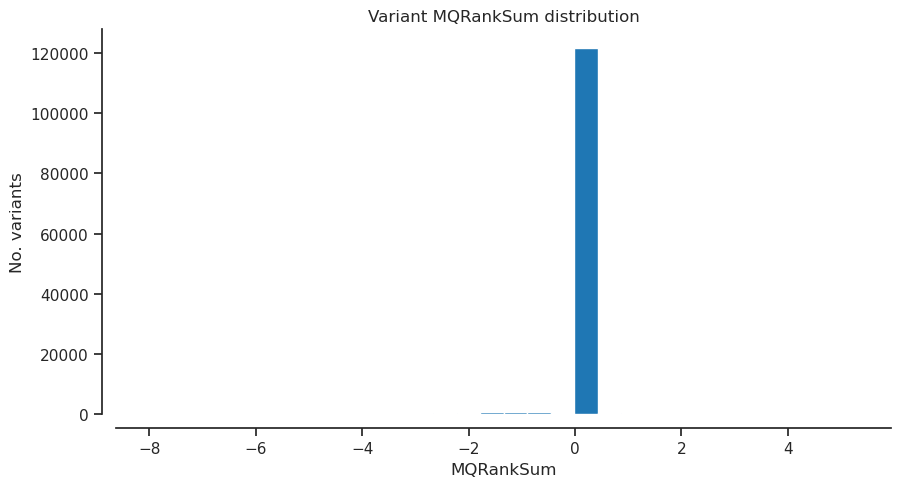

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

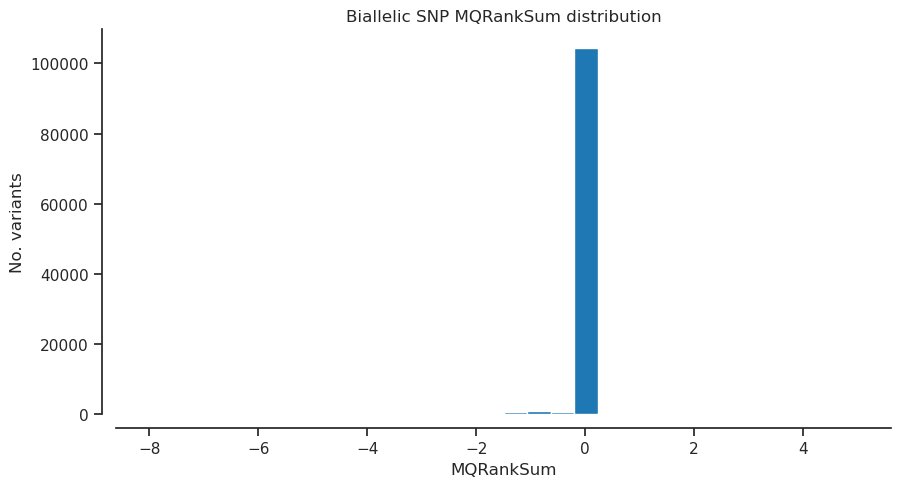

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

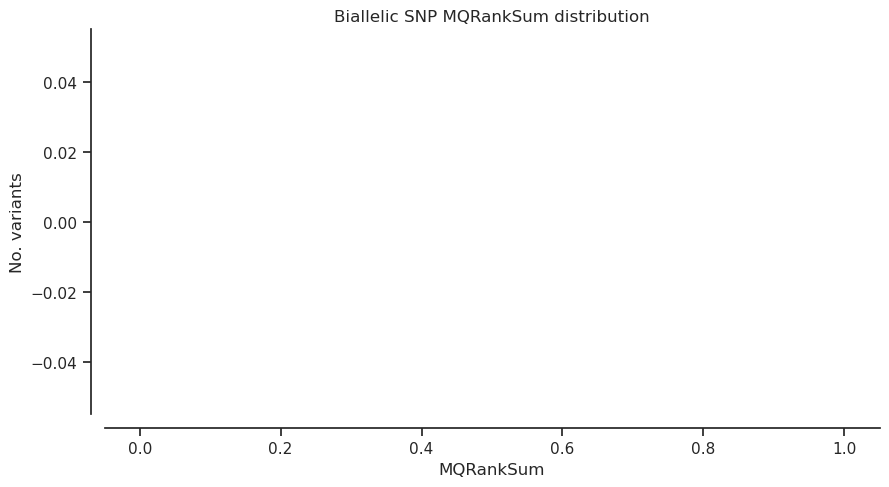

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

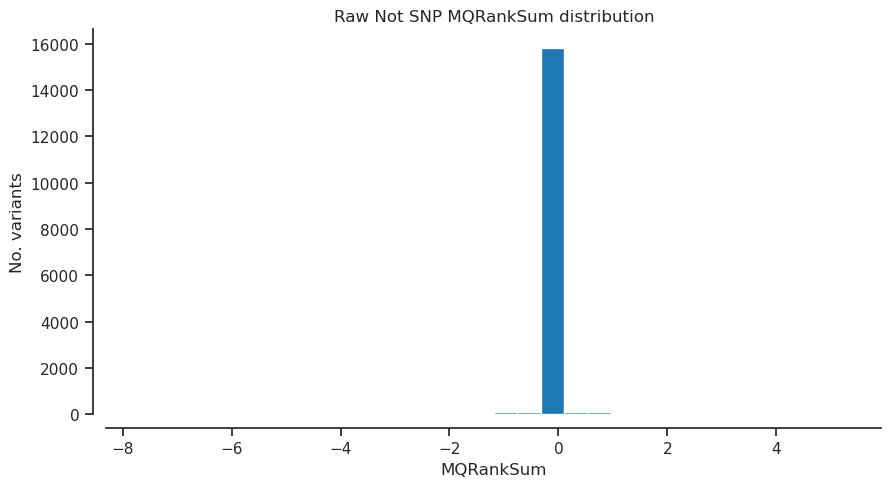

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

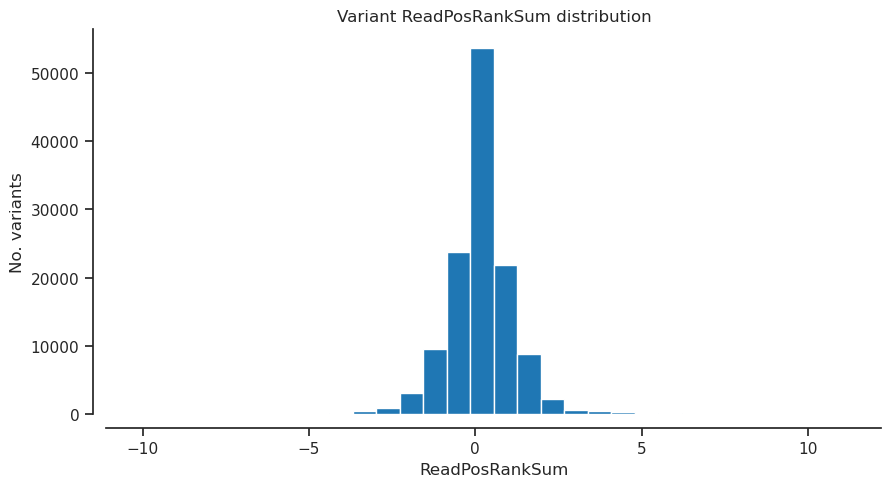

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

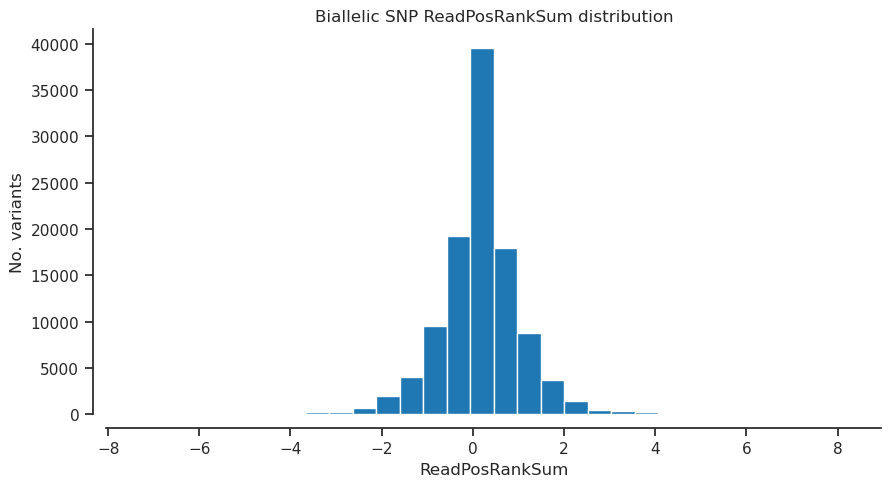

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

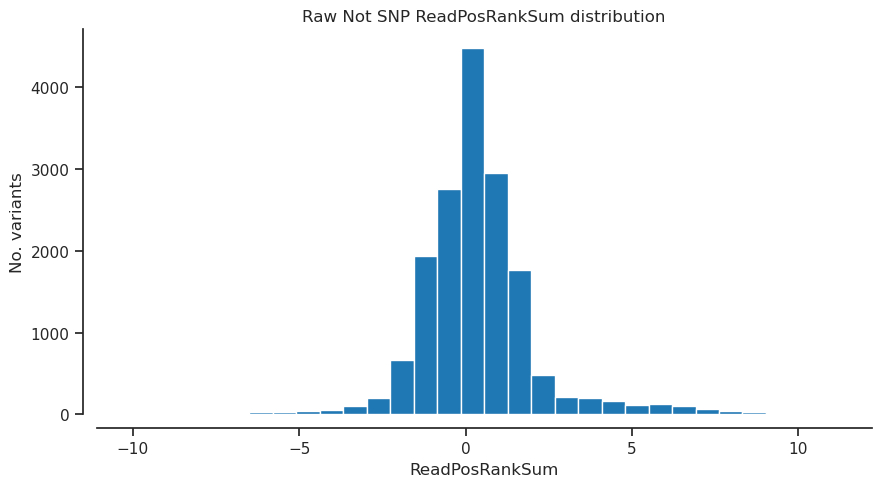

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

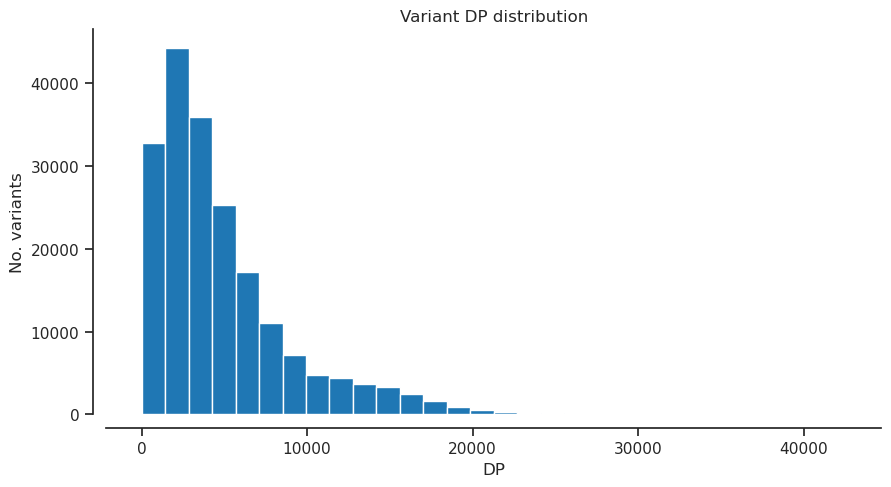

In [39]:
plot_hist('DP','var')

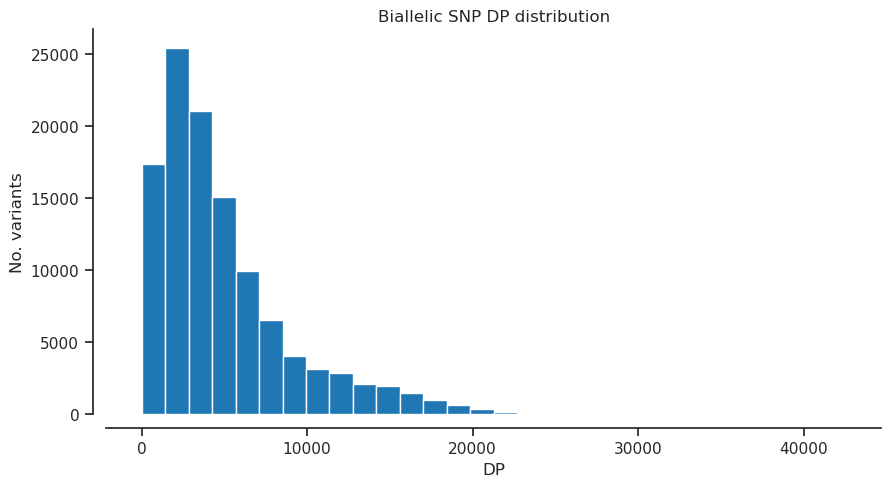

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

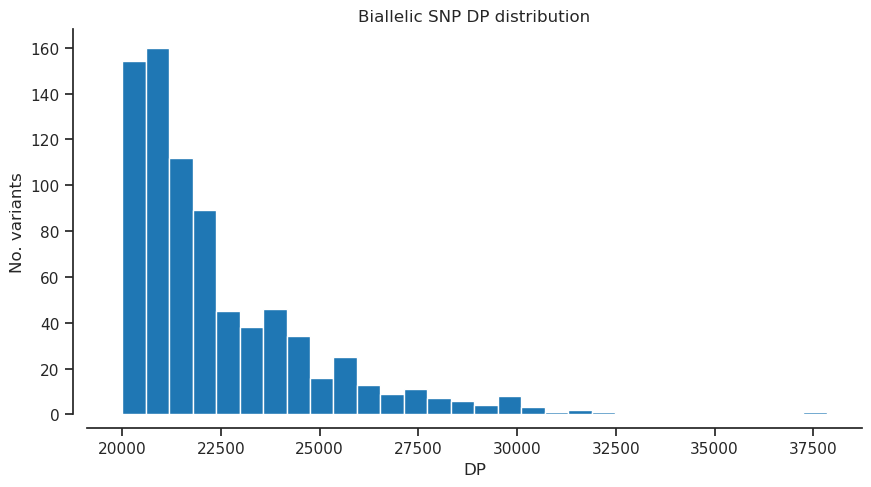

In [42]:
plot_hist('DP')

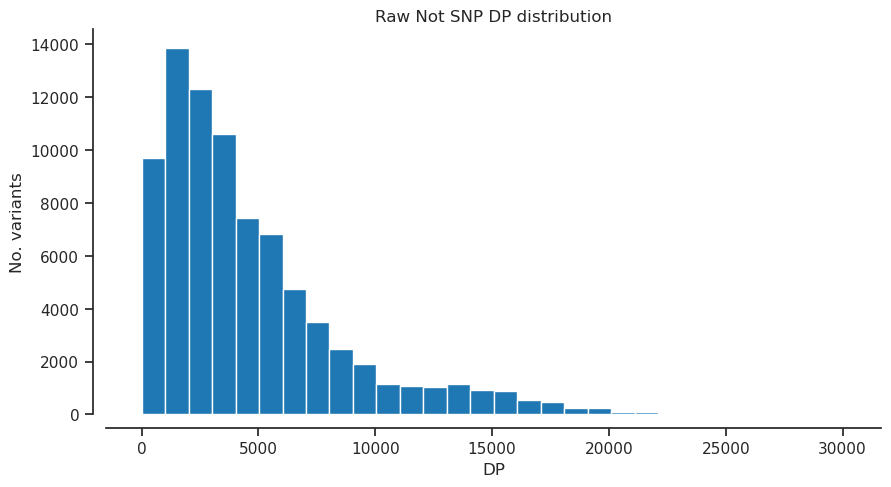

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

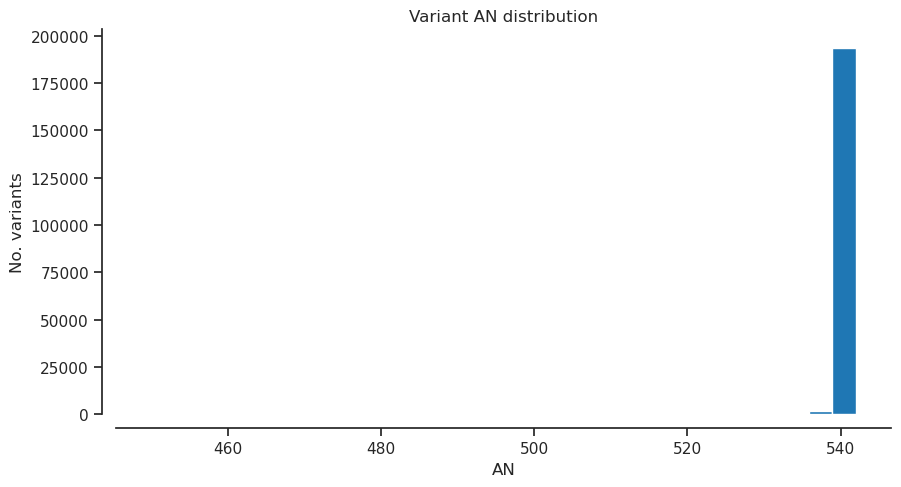

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

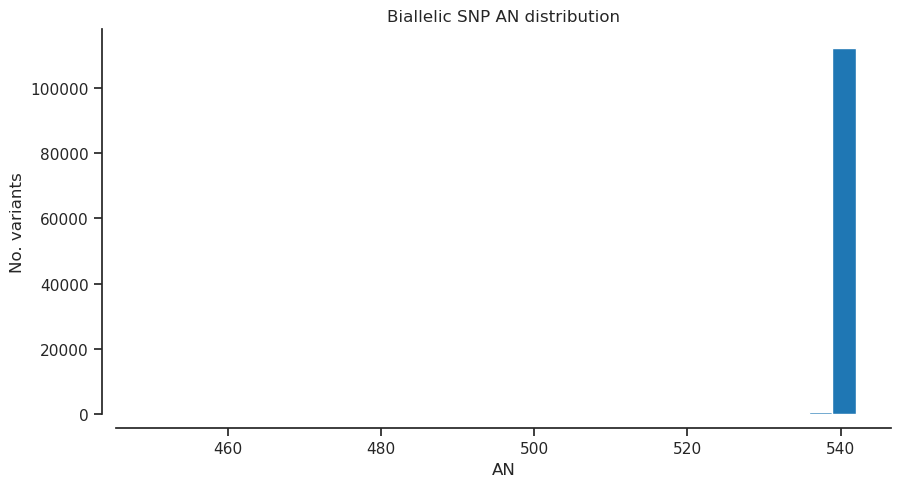

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

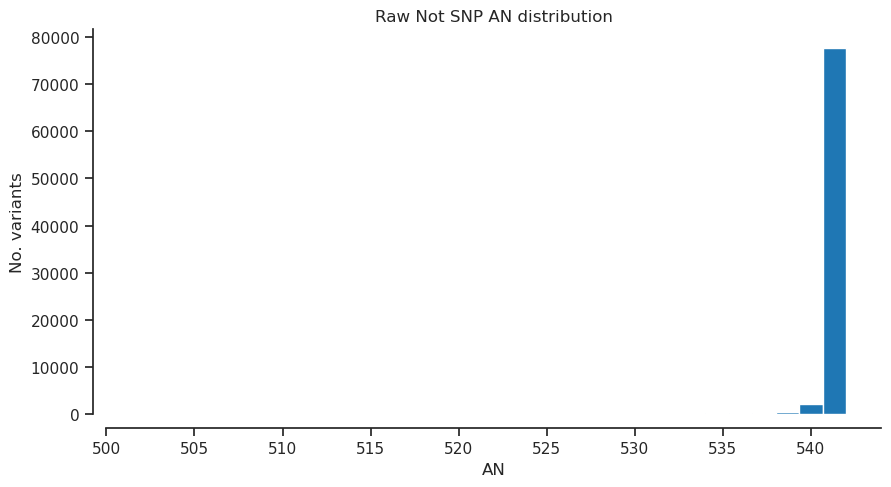

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

107096

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(196292, 271, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=101.5M cbytes=4.1M cratio=24.8
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(107096, 271, 2) dtype=int8 chunks=(1674, 271, 2)
   nbytes=55.4M cbytes=4.2M cratio=13.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(107096, 4) dtype=int32 chunks=(26774, 4)
   nbytes=1.6M cbytes=267.9K cratio=6.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(107096, 4) dtype=int32>
538   4   0   0
538   4   0   0
541   1   0   0
...
540   2   0   0
541   1   0   0
541   1   0   0

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[538,   4],
       [538,   4],
       [541,   1],
       ...,
       [540,   2],
       [541,   1],
       [541,   1]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

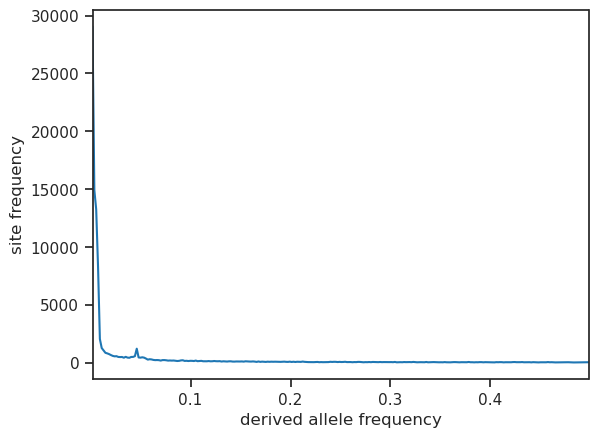

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(107096,) dtype=bool chunks=(107096,)
   nbytes=104.6K cbytes=7.5K cratio=13.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(105668, 271, 2) dtype=int8 chunks=(1652, 271, 2)
   nbytes=54.6M cbytes=4.1M cratio=13.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

105668

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

In [59]:
pc_missing

array([0.0047318 , 0.01230268, 0.01608813, 0.00189272, 0.01135632,
       0.02460537, 0.00851724, 0.01040996, 0.0141954 , 0.01230268,
       0.00567816, 0.01230268, 0.02176629, 0.02365901, 0.00567816,
       0.01798085, 0.01798085, 0.00567816, 0.0141954 , 0.03406897,
       0.01514176, 0.02744445, 0.01703449, 0.00851724, 0.01324904,
       0.00757088, 0.0047318 , 0.02744445, 0.00094636, 0.01040996,
       0.00757088, 0.0094636 , 0.02744445, 0.0141954 , 0.01324904,
       0.01987357, 0.01230268, 0.02081993, 0.02933717, 0.02744445,
       0.00283908, 0.00662452, 0.00189272, 0.03217625, 0.00567816,
       0.00283908, 0.00662452, 0.01608813, 0.02176629, 0.01040996,
       0.01608813, 0.01987357, 0.01040996, 0.0141954 , 0.01230268,
       0.02555173, 0.01230268, 0.01798085, 0.01703449, 0.00378544,
       0.0094636 , 0.03596169, 0.01230268, 0.01040996, 0.02365901,
       0.03501533, 0.01798085, 0.01608813, 0.01230268, 0.0047318 ,
       0.02460537, 0.02555173, 0.01987357, 0.02081993, 0.01419

## Samples

In [60]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'BEL00006-001',
 b'BEL00006-002',
 b'BEL00006-003',
 b'BEL00006-004',
 b'BEL00006-005',
 b'BEL00006-006',
 b'BEL00006-007',
 b'BEL00006-008',
 b'BEL00006-009',
 b'BEL00006-010',
 b'BEL00006-011',
 b'BEL00006-012',
 b'BEL00006-013',
 b'BEL00006-014',
 b'BEL00006-015',
 b'BEL00006-016',
 b'BEL00006-017',
 b'BEL00006-018',
 b'BEL00006-019',
 b'BEL00006-020',
 b'BEL00006-021',
 b'BEL00006-022',
 b'BEL00006-023',
 b'BEL00006-024',
 b'BEL00006-025',
 b'BEL00007-001',
 b'BEL00007-002',
 b'BEL00007-003',
 b'BEL00007-004',
 b'BEL00007-005',
 b'BEL00007-006',
 b'BEL00007-007',
 b'BEL00007-008',
 b'BEL00007-009',
 b'BEL00007-010',
 b'BEL00007-011',
 b'BEL00007-012',
 b'BEL00007-013',
 b'BEL00007-014',
 b'BEL00007-015',
 b'BEL00007-016',
 b'BEL00007-017',
 b'BEL00007-018',
 b'BEL00007-019',
 b'BEL00007-020',
 b'BEL00007-021',
 b'BEL00007-022',
 b'BEL00007-023',
 b'BEL00007-024',
 b'BEL00007-025',
 b'BGR00002-001',
 b'BGR00002-002',
 b'BGR00002-003',
 b'BGR00002-004',
 b'BGR00002-005',
 b'BGR0000

In [61]:
samples_fn = '~/scratch/data/Pavium/Prunus_avium_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,BEL00006-001,BEL00006
1,BEL00006-002,BEL00006
2,BEL00006-003,BEL00006
3,BEL00006-004,BEL00006
4,BEL00006-005,BEL00006
...,...,...
266,TUR00231-008,TUR00231
267,TUR00231-009,TUR00231
268,TUR00231-010,TUR00231
269,TUR00231-011,TUR00231


In [62]:
samples.Population.value_counts()

Population
BEL00006    25
BEL00007    25
BGR00002    25
CZE00156    25
DEU00001    25
ESP00082    25
ESP00219    25
ESP00246    25
NLD00003    25
TUR00228    22
TUR00231    12
TUR00229     8
TUR00230     4
Name: count, dtype: int64

In [63]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['BEL00006', 'BEL00007', 'BGR00002', 'CZE00156', 'DEU00001',
       'ESP00082', 'ESP00219', 'ESP00246', 'NLD00003', 'TUR00228',
       'TUR00229', 'TUR00230', 'TUR00231'], dtype=object)

## Gt frequency function

In [64]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 13)
    pop2color = {'BEL00006': palette[0],
                 'BEL00007': palette[7],
                 'BGR00002': palette[1],
                 'CZE00156': palette[8],
                 'DEU00001': palette[2],
                 'ESP00082': palette[9],
                 'ESP00219': palette[3],
                 'ESP00246': palette[10],
                 'NLD00003': palette[4],
                 'TUR00228': palette[11],
                 'TUR00229': palette[5],
                 'TUR00230': palette[12],
                 'TUR00231': palette[6]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[6])]
    ax.legend(handles=handles, labels=['BEL00006', 'BEL00007', 'BGR00002', 'CZE00156', 'DEU00001',
       'ESP00082', 'ESP00219', 'ESP00246', 'NLD00003', 'TUR00228', 'TUR00229',
       'TUR00230', 'TUR00231'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

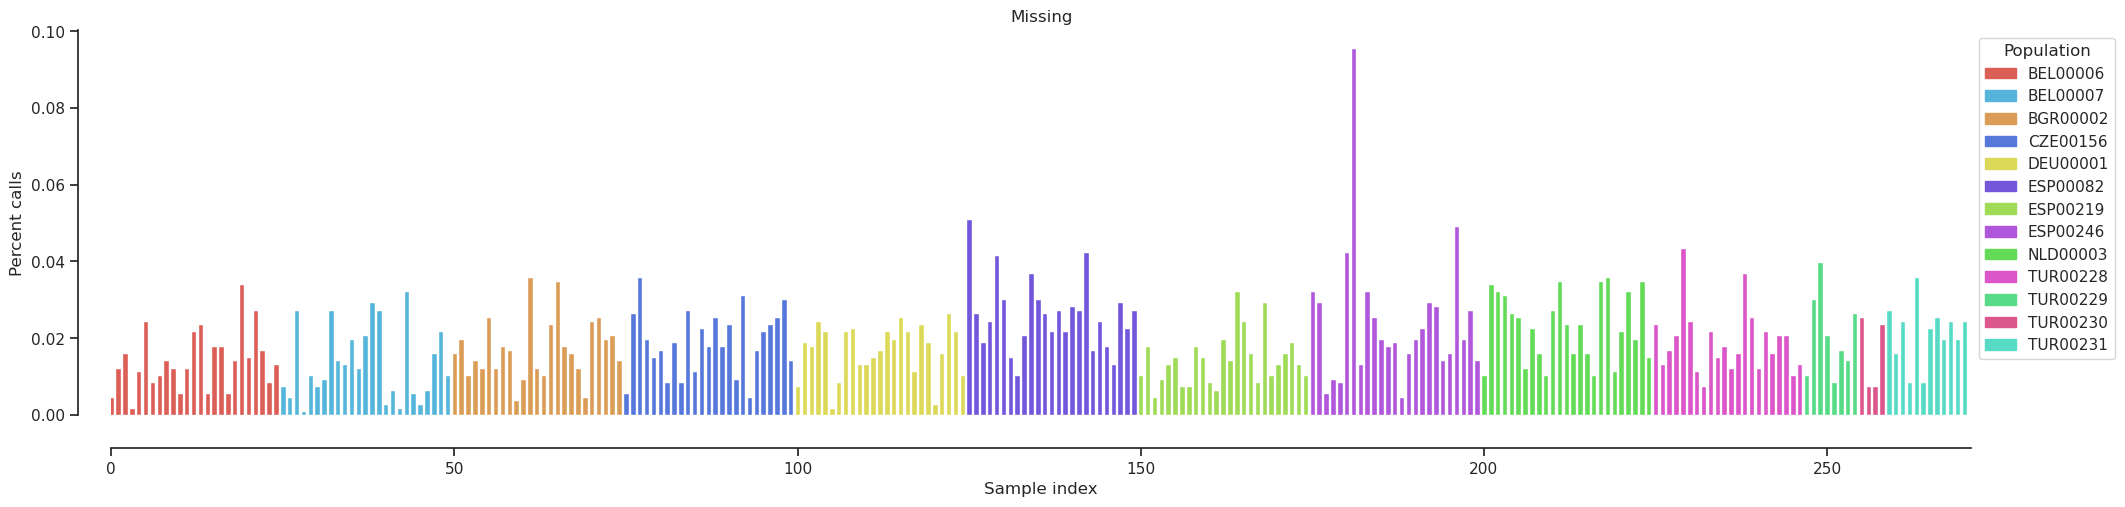

In [65]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

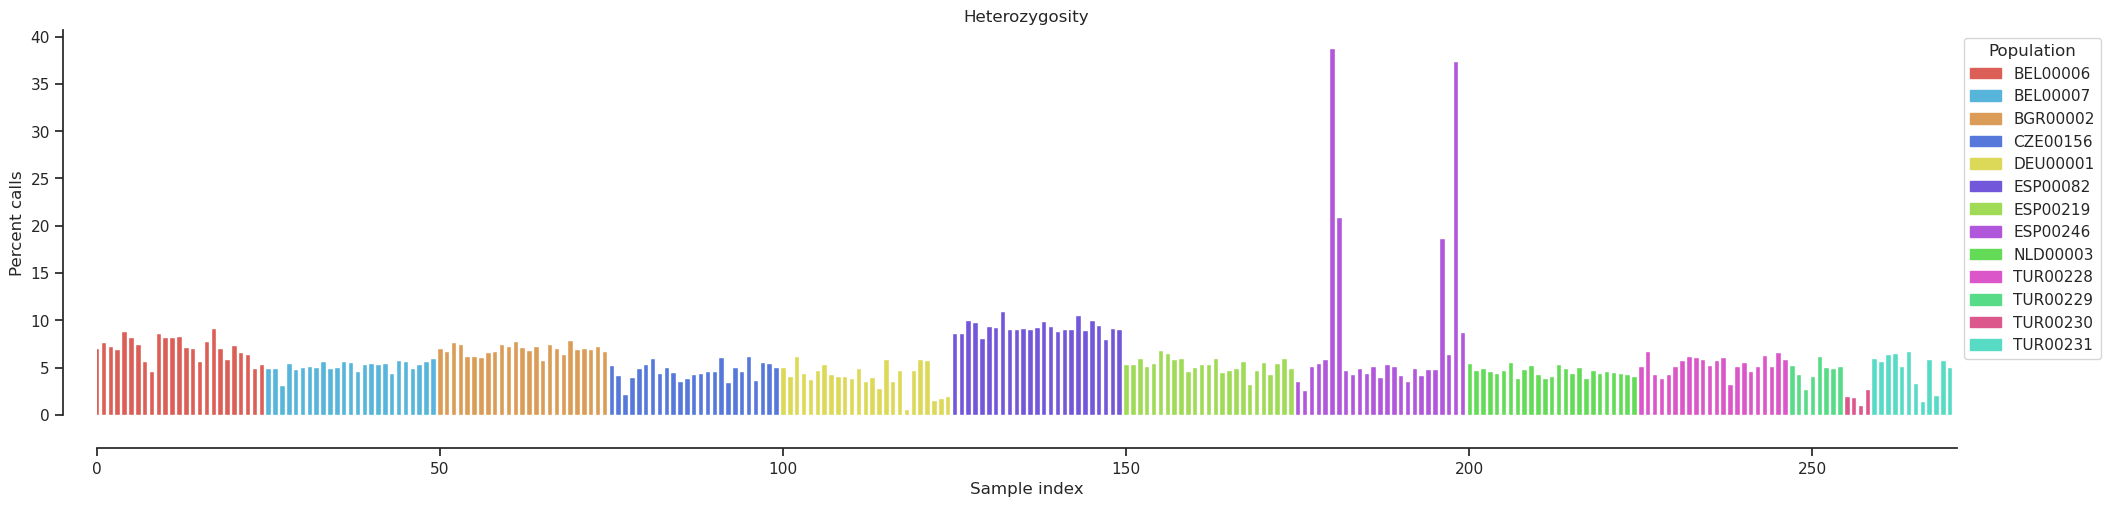

In [66]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [67]:
palette = sns.color_palette("hls",13)
pop_colours = {    
                'BEL00006': palette[0],
                 'BEL00007': palette[7],
                 'BGR00002': palette[1],
                 'CZE00156': palette[8],
                 'DEU00001': palette[2],
                 'ESP00082': palette[9],
                 'ESP00219': palette[3],
                 'ESP00246': palette[10],
                 'NLD00003': palette[4],
                 'TUR00228': palette[11],
                 'TUR00229': palette[5],
                 'TUR00230': palette[12],
                 'TUR00231': palette[6]
}

In [68]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [69]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(105668, 2) dtype=int32 chunks=(26417, 2)
   nbytes=825.5K cbytes=221.5K cratio=3.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [70]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(76593, 271) dtype=int8 chunks=(2394, 271)
   nbytes=19.8M cbytes=2.5M cratio=8.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [71]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

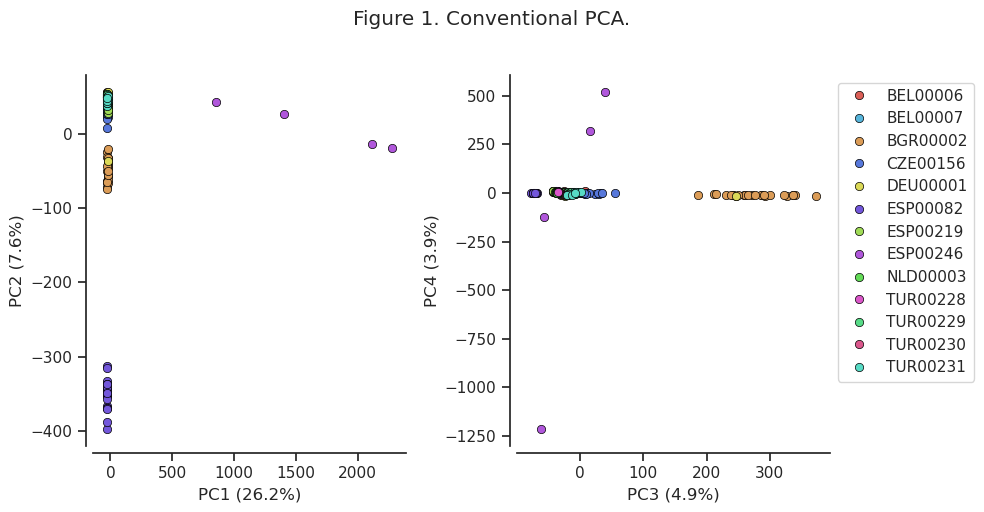

In [72]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [74]:
outliers = coords1[:,0]>800
samples[outliers]

,ID,Population
180,ESP00246-006,ESP00246
181,ESP00246-007,ESP00246
196,ESP00246-022,ESP00246
198,ESP00246-024,ESP00246


In [75]:
pc_het[outliers]

array([38.77238142, 20.92781164, 18.65749328, 37.40583715])

In [76]:
pc_missing[outliers]

array([0.04258621, 0.09558239, 0.04921074, 0.02744445])